#**Problem Statement: Boosting Models with AdaBoost**

The ‘seeds.csv’dataset  contains  the  data  about  thewheat  seeds,  the ‘Type’column consistof three unique values, 1, 2, 3, which are classified based on the characteristicsof seeds entailingin other columns.Load the‘seeds.csv’ dataset into a DataFrameand considering the 'Type' column as target, performthe following tasks:

1.Analyze the target columnby printing it’s unique values

2.Separate the feature vectors and the target variable

3.Split the dataset into train and test setsin a 70:30 ratio

4.Builda  DecisionTree  Classifier  and  a  GaussianNB  modeland  print  their accuracy scores

5.For the Decision Tree Classifier and a GaussianNB models boost the accuracy using  AdaBoost  Classifier  and  compare  the  accuracy  scores  with  original models using a bar plot

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/seeds.csv')
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**1.Analyze the target columnby printing it’s unique values**


In [ ]:
df.Type.unique()

array([1, 2, 3])

In [ ]:
target_ratio=pd.DataFrame({'Counts':df.Type.value_counts(),'Percentage':df.Type.value_counts()/len(df)})
target_ratio

,Counts,Percentage
2,68,0.341709
1,66,0.331658
3,65,0.326633



**2.Separate the feature vectors and the target variable**


In [ ]:
x=df.drop(['Type'],axis=1)
y=df.Type
display(x.head())
display(y.head())

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


**3.Split the dataset into train and test setsin a 70:30 ratio**


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)


**4.Build a  DecisionTree  Classifier  and  a  GaussianNB  model and  print  their accuracy scores**


In [ ]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print("Accuracy score of decision tree is:\n",acc_dt)

Accuracy score of decision tree is:
 0.583


In [ ]:
gnb_model=GaussianNB()
gnb_model.fit(x_train,y_train)
gnb_pred=gnb_model.predict(x_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print("Accuracy score of Gasussian model is:\n",acc_gnb)

Accuracy score of Gasussian model is:
 0.933



**5.For the Decision Tree Classifier and a GaussianNB models boost the accuracy using  AdaBoost  Classifier  and  compare  the  accuracy  scores  with  original models using a bar plot**

In [ ]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(x_train,y_train)
ada_pred=ada.predict(x_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)

0.883


In [ ]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=70,learning_rate=0.5)
ada_gnb.fit(x_train,y_train)
agnb_pred=ada_gnb.predict(x_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

0.95


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<BarContainer object of 4 artists>

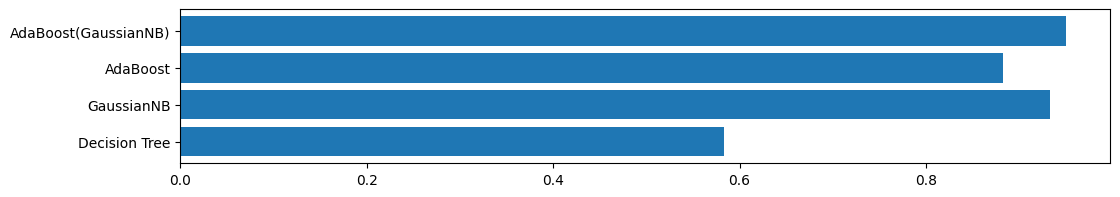

In [ ]:
plt.figure(figsize=(12,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
         tick_label=['Decision Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])
